In [6]:
from xclim import sdba

# dqm.train(ref, hist)
# scen = dqm.adjust(sim)

In [7]:
import xarray as xr
import numpy as np
from os import path, listdir


path_data = '/home/nils/ramboll/paris/data/'
path_adjust = '/home/nils/ramboll/paris/data_adjust/'
path_pics = '/home/nils/Dropbox/Paris_diag_climat - Documents/9_climate/pics/'
path_obs = '/home/nils/Dropbox/Paris_diag_climat - Documents/5_travail/1_phase1/1_1projections/observation/'

tas_files = [path.join(path_data,'tas',f) for f in listdir('data/'+ 'tas' )]
tasmin_files = [path.join(path_data,'tasmin',f) for f in listdir('data/'+ 'tasmin' )]
tasmax_files = [path.join(path_data,'tasmax',f) for f in listdir('data/'+ 'tasmax' )]
pr_files = [path.join(path_data,'pr',f) for f in listdir('data/'+ 'pr' )]
# xr.concat

# Observation:


In [8]:
def sortssp_by_drsname(resource): 
    nc_datasets = {}
    tmp_dic = {}

    try:
        for nc in resource:
            # LOGGER.info('file: %s' % nc)
            p, f = path.split(path.abspath(nc.replace('.nc', '')))
            n = f.split('_')
            if len([int(i) for i in n[-1].split('-') if i.isdigit()]) == 2:
                bn = '_'.join(n[0:-1])  # skipping the date information in the filename
                nc_datasets[bn] = []  # dictionary containing all datasets names
            elif len([int(i) for i in n[-2].split('-') if i.isdigit()]) == 2:
                bn = '_'.join(n[0:-2])  # skipping the date information in the filename
                nc_datasets[bn] = []  # dictionary containing all datasets names
            else:
                print('file is not DRS convention conform!')
        
            #  select only necessary names
            ssp_datasets = nc_datasets.copy()
            if any("_ssp" in s for s in nc_datasets.keys()):
                for key in nc_datasets.keys():
                    if 'historical' in key:
                        ssp_datasets.pop(key)
                nc_datasets = ssp_datasets.copy()
                print('historical data set names removed from dictionary')
            else:
                print('no SSP dataset names found in dictionary')
        print('Got dataset names for dic keys')         
    except Exception as e: 
        print('failed to get dataset names for dic keys {}'.format(e))
              
    # collect the file according to datasets          
    for key in nc_datasets:
        try:
#             if historical_concatination is False:
#                 for n in resource:
#                     if '%s_' % key in n:
#                         nc_datasets[key].append(path.abspath(n))  # path.join(p, n))
#    ex = ['ssp119', 'ssp126', 'ssp245', 'ssp370',  'ssp434','ssp460','ssp585',
              
#             elif historical_concatination is True:
            key_hist = key.replace('ssp119', 'historical').\
                replace('ssp126', 'historical').\
                replace('ssp245', 'historical').\
                replace('ssp370', 'historical').\
                replace('ssp434', 'historical').\
                replace('ssp460', 'historical').\
                replace('ssp585', 'historical')
            for n in resource:
                if '{}_'.format(key_hist) in n:
                    nc_datasets[key].append(path.abspath(n))
                if '{}_'.format(key) in n:
                    nc_datasets[key].append(path.abspath(n))  # path.join(p, n))
#             else:
#                 LOGGER.error('append file paths to dictionary for key %s failed' % key)
            nc_datasets[key].sort()
        except Exception as e:
            print('failed for{e}'.fromat(e))          
    return nc_datasets

In [12]:
ds = sortssp_by_drsname(pr_files)

var = 'pr'
tas_obs = xr.open_dataset(path.join(path_obs + '{}_day_montsouris-observation.nc'.format(var)))

for key in ds:
    try:
        files = []
        for f in ds[key]:
            files.append(xr.open_dataset(f))

        ts = xr.concat(files, 'time')
        ts.attrs['experiment_id'] = key.split('_')[3]

        dqm = sdba.adjustment.DetrendedQuantileMapping()
        # dqm = sdba.EmpiricalQuantileMapping(nquantiles=20, group='time', kind='+')
        # QM.train(ref, hist)

        dqm.train(tas_obs[var].sel(time=slice("1971-01-01", "2000-12-31")), 
                  ts[var].sel(time=slice("1971-01-01", "2000-12-31")))
        scen = dqm.adjust(ts[var])
        ts[var].values = scen.values
        out_file = path.join(path_adjust, var, '{}.nc'.format(key))
        ts.to_netcdf(out_file, unlimited_dims='time')
        ts.close()
    except Exception as e: 
        print('failed for {} : {}'.format(key, e))

historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary


/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bounds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  UserWarning,
/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bounds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  UserWarning,
/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 

failed for pr_day_IPSL-CM6A-LR_ssp460_r1i1p1f2_gr : dayofyear must not be empty


/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bounds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  UserWarning,
/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bounds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  UserWarning,
/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 

/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bounds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  UserWarning,
/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bounds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  UserWarning,
/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 

/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bounds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  UserWarning,
/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bounds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  UserWarning,


'ssp126'

In [ ]:
tas_day_CNRM-ESM2-1_ssp126_r4i1p1f2_gr
tas_day_IPSL-CM6A-LR_ssp460_r1i1p1f2_gr

In [104]:

out_file = path.join(path_adjust, var, '{}.nc'.format(key))
out_file

'/home/nils/ramboll/paris/data_ajust/tas/tas_day_CNRM-ESM2-1_ssp245_r4i1p1f2_gr.nc'

In [92]:
scen = dqm.adjust(ts[var])
# ts['tas'].values = scen.values
# ts.to_netcdf(path.join(path_adjust,var , "/{}.nc".format(key)), unlimited_dims='time')
# ts.close()

ValueError: Multiple chunks along the main adjustment dimension time is not supported.

In [93]:
ds[key]

['/home/nils/ramboll/paris/data/tas/tas_day_CNRM-ESM2-1_historical_r4i1p1f2_gr_18500101-20141231_sub.nc',
 '/home/nils/ramboll/paris/data/tas/tas_day_CNRM-ESM2-1_ssp245_r4i1p1f2_gr_20150101-21001231_sub.nc']

In [63]:
files = []
for f in enumerate(ds['tas_day_CNRM-CM6-1_ssp370_r5i1p1f2_gr']):
    files.append(xr.open_dataset(f))

ts = xr.concat(files, 'time')    

In [80]:
ds['tas_day_CNRM-CM6-1_ssp370_r5i1p1f2_gr']

['/home/nils/ramboll/paris/data/tas/tas_day_CNRM-CM6-1_historical_r5i1p1f2_gr_18500101-20141231_sub.nc',
 '/home/nils/ramboll/paris/data/tas/tas_day_CNRM-CM6-1_ssp370_r5i1p1f2_gr_20150101-21001231_sub.nc']

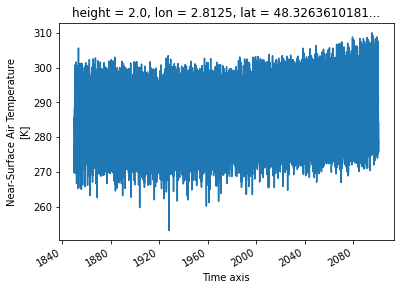

In [83]:
ts['tas'].plot()

In [32]:
# file_hist = '/home/nils/ramboll/paris/data/pr/pr_day_CNRM-CM6-1_historical_r10i1p1f2_gr_19500101-20141231_sub.nc'


hist = xr.open_dataset(file_hist)
ref = xr.open_dataset(file_obs)

ref = xr.DataArray(val_obs, dims=('time',), coords={'time': ts_obs}, attrs={'units': 'K'})
hist = xr.DataArray(val_hist, dims=('time',), coords={'time': ts_hist}, attrs={'units': 'K'})

In [44]:

# dqm.train(obs['tas'].sel(time=slice("1999-01-01", "2000-12-31")), hist['tas'].sel(time=slice("1971-01-01", "2000-12-31")))

In [75]:
scen.values

array([[[283.11070111]],

       [[285.09585079]],

       [[282.85011458]],

       ...,

       [[282.16726647]],

       [[279.29240315]],

       [[279.72952784]]])

/home/nils/anaconda3/envs/flyingpigeon/lib/python3.7/site-packages/xarray/conventions.py:427: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bounds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  UserWarning,


In [78]:
scen.mean()

<xarray.DataArray ()>
array(285.75631892)
Coordinates:
    height   float64 2.0

In [59]:
# ts.close()
# tas_obs.close()
scen.var?
# scen.to_netcdf(path.join(path_adjust, "tas/test.nc"), unlimited_dims='time')

In [69]:
ds_ad = sdba.processing.adapt_freq(sim=hist['pr'], ref=ref['pr'], thresh=0.05)
QM_ad = sdba.EmpiricalQuantileMapping(nquantiles=15, kind='*', group='time')
QM_ad.train(ref['pr'], ds_ad.sim_ad)
scen_ad = QM_ad.adjust(hist['pr'])

In [24]:
import numpy as np
tas = np.squeeze(obs['tas'])


In [45]:
sl = obs['tas'].sel(time=slice("2000-06-01", "2000-06-10"))

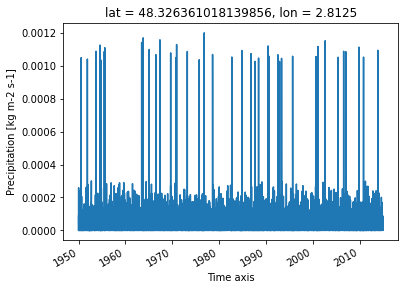

In [65]:
# dif = hist - scen 
scen.plot()

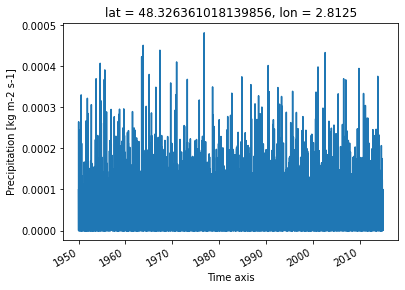

In [59]:
hist['pr'].plot()

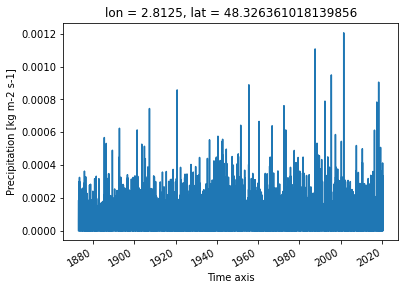

In [63]:
obs['pr'].plot()

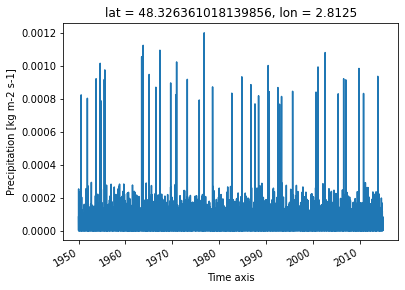

In [71]:
scen_ad.plot()